<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_03_reg_lin_grad_descV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Estructura de un problema general de machine learning:
Los modelos de aprendizaje estadístico que pueden ser industriazados,   puede ser [esquematizado](https://proceedings.neurips.cc/paper/2015/file/86df7dcfd896fcaf2674f757a2463eba-Paper.pdf) según se muestra en la siguiente imagen:

![MLOPs](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_MLOP_General.png?raw=true)


![MLOPs](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_MLOPS.png?raw=true)



A partir de ahora, nos concentraremos en entender los modelos de que ocurren dentro de la caja negra, y como encajan dentro de una estructura general de los modelos de machine learning ML.

De forma general un modelo de [ML](https://www.coursera.org/learn/machine-learning)   puede ser visualizado de la siguiente manera :

![SupervisedModel](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_GeneralTraining.png?raw=true)



## ¿Cual es el mejor enfoque para optimizar un problema?

[Non-Free-Lunch-Theorem](https://ieeexplore.ieee.org/document/585893):
Por cada par de algoritmos hay tantos problemas en el que el primer algoritmo es mejor que el segundo como problemas en el que el segundo es mejor que el primero, como consecuencia no existe un unico algoritmo inteligente para optimizar un problema, siempre es recomendable emplear un cierto conocimiento especifico de un problema.



##  Estructura general de los problemas ML:
1. Construir hipotesis.
2. Elegir parametros
3. Elegir la funcion de coste.
4. Minimizar los datos
5. Validar y entrenar.



## Aprendizaje Supervisado :

- Datos etiquetados
- Retroalimentación directa
- Predicción de resultados.










# Regresión lineal:

Supongamos que tenemos un sistema en el que existe un predicor con  **m** valores de entrenamiento,  asi:   $ (x^{(1)}, y^{(1)} ) , (x^{(2)}, y^{(2)}) ... (x^{(m)}, y^{(m)})$


|Training|Y      | X_1  |
|--------|----------|----------|
|1|$Y^{1}$ | $X_1^{1}$|
|2|$Y^{2}$ | $X_1^{2}$|
|.|.         | .        |
|.|.         | .        |
|.|.         | .        |
|m|$Y^{m}$ | $X_1^{m}$  |



Podemos definir un modelo lineal  como : $h(X) = \theta_0 + \theta_1 X$ con $(\theta_0 , \theta_1)$ parámetros. Nuestro objetivo es encontrar el conjunto de puntos  $(\theta_0 , \theta_1)$ que se encuentan más "cercano" a $Y$ para cada $X$.

Para la optimización, vamos a definir la función de coste **$J(\theta_1,\theta_2 )$** para las muestras de entrenamiento como aquella que garantiza la distancia euclidiana respecto a la hipotesis planteada, así:

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( h_{\theta} (x^{(i)})-y^{(i)})^2
\end{equation}

Para encontrar los valores  $(\theta_0 , \theta_1)$ se necesita  minimizar la función de coste, que permite obtener los valores más cercanos,  esta minimización podrá ser realizada a través de diferentes métodos el más conocido es el gradiente descendente.

![](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/fig00.png?raw=true=50x)




Supongamos un modelo lineal para realizar la predicción, así nuestro modelo estará basado en la siguiente hipotesis de trabajo:

$h(X) =\theta_0 + \theta_1 X$


Reemplando el modelo anterior en la función de coste, tenemos que:



\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X)- y^{(i)})^2
\end{equation}



# Laboratorio 03


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

In [35]:
m = 100
dicc = {'Entrenamiento': np.arange(0,m,1), 'Y': np.arange(0,m,1), 'X_1': np.arange(0,m,1)}
data = pd.DataFrame(dicc)
data.head()

,Entrenamiento,Y,X_1
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4


#### 2. Crear una función para calcular la función de coste.

In [36]:
def H(theta, X):
  return theta.T@X

'''
SIN VECTORIZAR
def H(theta, X):
  return theta[0] + theta[1]*X
'''

def costo(H, Y):
  return np.mean((H-Y)**2)

#### 3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.

Explicación/Notas:

Se busca la expresión de una recta que permita ajustar los datos que creamos en el dataframe. La ecuación es

$$
y(x) = \theta_0 + \theta_1*x
$$

En este caso, tenemos $\theta_0 = 0$

De forma matricial y teniendo en cuenta que tenemos multiples valores de la función para cada par de valores (x,y) podemos ver este conjunto de valores en una matriz (1xm) que surgen al momento de realizar el producto matricial entre una matriz (1x2) que contiene los diferentes valores de los parámetros (en este caso sólo hay 2) y la matriz (2xm) cuya primera fila es la lista de algún coeficiente que acompaña al parámetro $\theta_0$ (en este caso puede ser cualquiera dado que el parámetro es cero) y donde su segunda fila es la lista de valores de los datos x.

$$
H = (θ_0, θ_1)\times \begin{bmatrix}
1 & 1 & 1&1 &... \\
0&1&2&3&...
\end{bmatrix}
$$

Hecho esto, se calcula la función de Coste expresada más arriba y el objetivo es encontrar los parámetros que minimizan el valor de esta función.


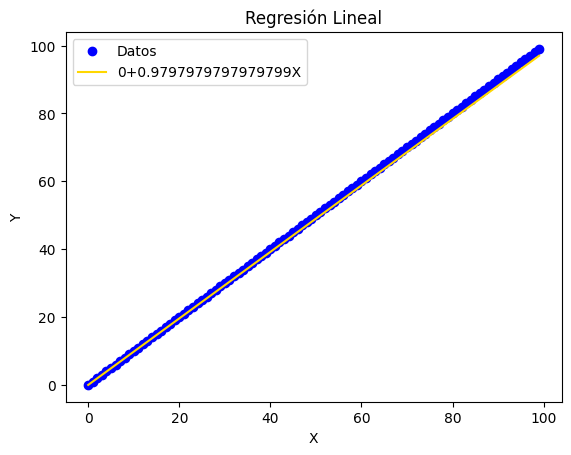

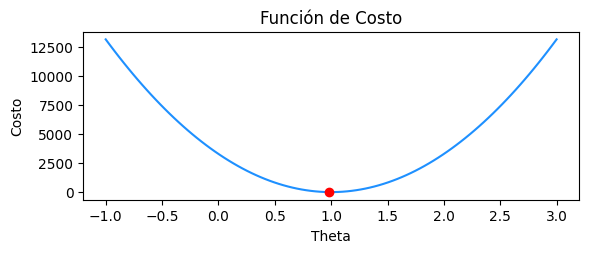

In [37]:
# Datos
x = data['X_1']
y = data['Y']

# Matrices
theta0 = 0
theta = np.linspace(-1, 3, m)        # Lista de thetas
matrix = np.array([np.ones(m), x])   # MAtriz 2xm

costos = np.zeros(len(theta))
for i, t_ in enumerate(theta):
  thetas = np.array([theta0, t_])
  H1 = H(thetas, matrix)
  costos[i] = costo(H1, y)

def Regresion(theta, x, costo):
  return theta0 + theta[np.argmin(costo)]*x

# Gráficas
plt.subplot(1, 1, 1)
plt.plot(x, y, 'bo')
plt.plot(x, Regresion(theta, x, costos), 'gold')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regresión Lineal")
plt.legend(["Datos", f"{theta0}+{theta[np.argmin(costos)]}X"])
plt.show()

plt.subplot(2, 1, 2)
plt.plot(theta, costos, 'dodgerblue')
#plt.vlines(theta[np.argmin(costos)], costos.min(), costos.max())
plt.plot(theta[np.argmin(costos)], costos.min(), 'ro')
plt.xlabel("Theta")
plt.ylabel("Costo")
plt.title("Función de Costo")
plt.show()

Vemos que el valor de theta que hace que la función de costo sea mínima no es 1. Esto sucede por la forma en la que se define el array de los thetas. En este array no está el valor '1'. Por esto, el parámetro que ajusta es el valor más cercano a 1 que es lo que debemos esperar puesto que los datos representan una línea recta con ecuación y = x+0

#### 4. Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

In [66]:
# Matrices
theta0 = np.linspace(-3, 3, m)       # Lista de thetas 0
theta = np.linspace(-1, 3, m)        # Lista de thetas
t0, t1 = np.meshgrid(theta0, theta)

matrix = np.array([np.ones(m), x])   # MAtriz 2xm

J = np.zeros((len(theta0), len(theta)))
for i, t0_ in enumerate(theta0):
  for j, t_ in enumerate(theta):
    thetas = np.array([t0_, t_])
    H1 = H(thetas, matrix)
    J[i,j] = costo(H1, y)

In [69]:
# Para hallar los parámetros que minimizan el costo primero busco
# en qué posición de la matriz J se encuentra el valor mínimo. Estas
# coordenadas dirán cuál es el theta0 y theta1 correcto en el grid t0 y
# y t1 respectivamente.

arg_t0, arg_t1 = np.unravel_index(np.argmin(J), J.shape)
theta0_min = t0[arg_t0, arg_t1]
theta1_min = t1[arg_t1, arg_t0]

def Regresion2(t0, t1, x, costo):
  indices = np.unravel_index(np.argmin(costo), costo.shape)
  return t0[indices] + t1[indices[::-1]]*x

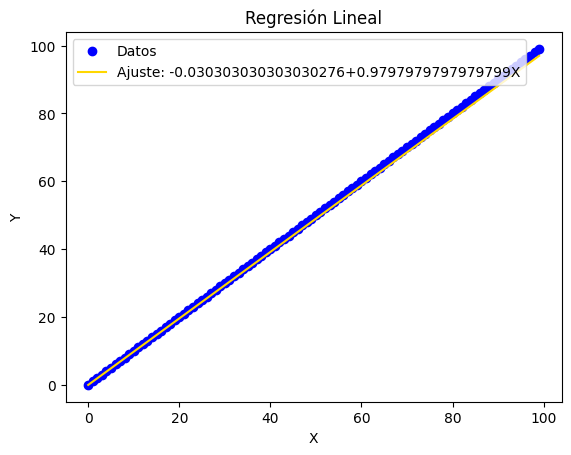

In [70]:
plt.plot(x, y, 'bo')
plt.plot(x, Regresion2(t0, t1, x, J), 'gold')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regresión Lineal")
plt.legend(["Datos", f"Ajuste: {theta0_min}+{theta1_min}X"])
plt.show()

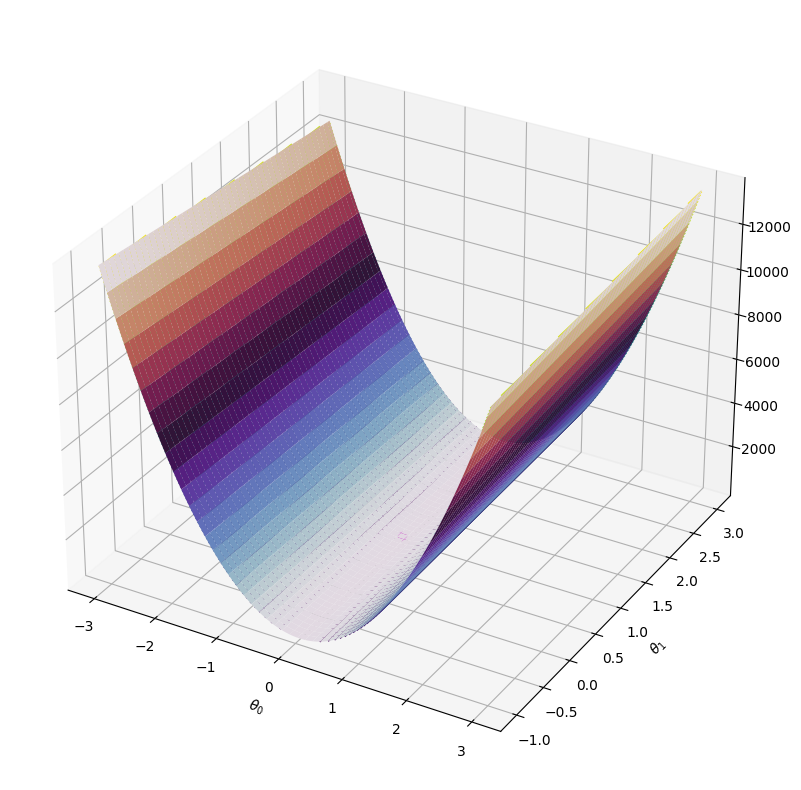

In [71]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(t0, t1, J, cmap='twilight')
ax.contour(t0, t1, J, 100, linestyles="solid")
ax.plot(theta0_min, theta1_min, J.min(), 'mo')
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()

#### 5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.

Las funciones de coste son:
- Caso 1D
$$
J(0.979) = \frac{1}{2m} \sum_{i=1}^{m} (0.979*X - y^{(i)})^2
$$

- Caso 2D
$$
J(-0.03, 0.979) = \frac{1}{2m} \sum_{i=1}^{m} (-0.03 + 0.979*X - y^{(i)})^2
$$

# Gradiente Descendente


Para determinar el mínimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:

- Proponer un número aleatorios inicial $\omega_i$
- Para descender al mínimo de la función, encontremos un  valor para el cual
el deriva de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo.

- Evaluar $f(\omega_{i+1})$

- Iterar hasta encontrar el mínimo de la función


#### 6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$

In [72]:
def minimo(f, df, alpha, epsilon, wi):
  w = wi
  paso = 0
  while np.abs(df(w)) > epsilon:
    w = w - alpha*df(w)
    paso += 1
  return f(w), w, paso

def f(x):
  return (x-4)**2

def df(x):
  return 2*(x-4)

In [73]:
alphas = [0.1, 0.01, 0.001]

for i in alphas:
  print(f'Para alpha={i}')
  print(f'Mínimo de la función: {minimo(f, df, i, 1E-4, 10)[0]}, x mínimo: {minimo(f,df,i,1E-4, 10)[1]}\n')

Para alpha=0.1
Mínimo de la función: 1.9223883323571548e-09, x mínimo: 4.00004384504912

Para alpha=0.01
Mínimo de la función: 2.489419875881217e-09, x mínimo: 4.000049894086582

Para alpha=0.001
Mínimo de la función: 2.4977381219980957e-09, x mínimo: 4.000049977376102



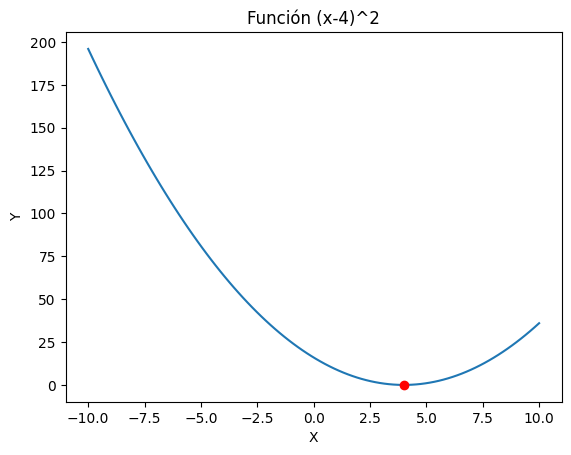

In [76]:
plt.plot(np.linspace(-10, 10, 100), (np.linspace(-10, 10, 100)-4)**2)
plt.plot(minimo(f,df,0.1,1E-4, 10)[1], minimo(f,df,0.1,1E-4, 10)[0], 'ro')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Función (x-4)^2")
plt.show()

# Modelo de *machine learning*: Solución general

Un modelo general para solucionar un problema de machinine learning puede ser estructurado como sigue:


a. Eliger el modelo a emplear:
\begin{equation}
h(X,\Theta)
\end{equation}

- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:

    \begin{equation}
    h(X) = (\theta_0 + \theta_1 X)
    \end{equation}


b. Eligir la funcion de coste :
-  Metrica Ecuclidiana:
\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}
- [Lista de funciones de coste que pueden ser empleadas](https://jmlb.github.io/flashcards/2018/04/21/list_cost_functions_fo_neuralnets/)


c. Aplicar el gradiente descendente iterativamente, hasta encontrar el minimo:  

\begin{equation}
\Delta \vec{\Theta} =  - \alpha \nabla J(\Theta)
\end{equation}



- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:


\begin{equation}
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
\end{equation}

#### 7. Para responder este punto puede consultar la siguiente  página y seguir el video[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.



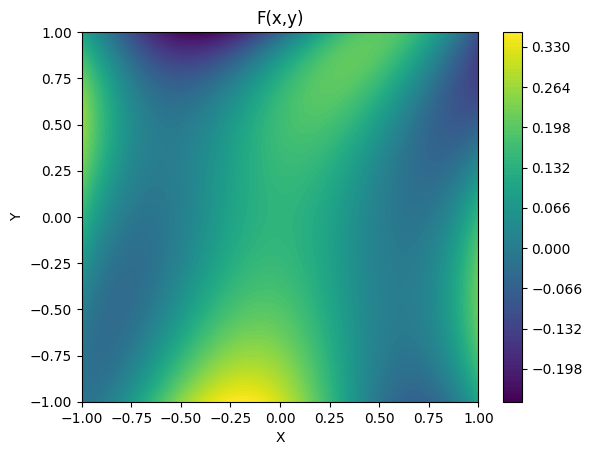

Text(0.5, 0.92, 'F(x,y)')

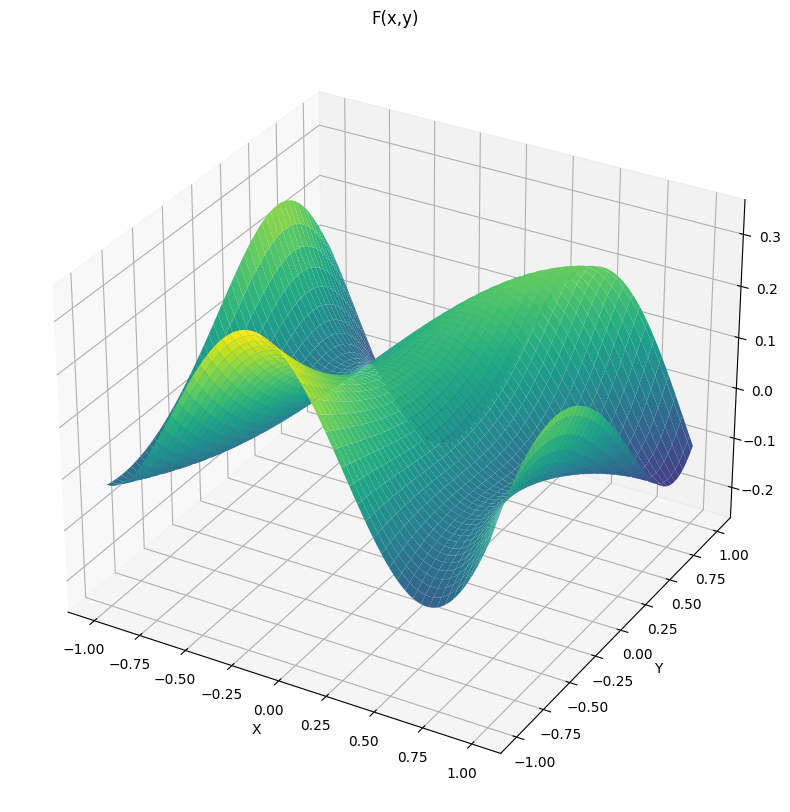

In [77]:
f = lambda x, y: np.sin(0.5*x**2-0.25*y**2+3)*np.cos(2*x+1-np.exp(y))

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# MAPA DE CONTORNO
plt.contourf(X, Y, Z, 100, cmap='viridis')
plt.colorbar()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("F(x,y)")
plt.show()

# GRÁFICA 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("F(x,y)")

[ 0.42727125 -0.23859149]


Text(0.5, 1.0, 'F(x,y)')

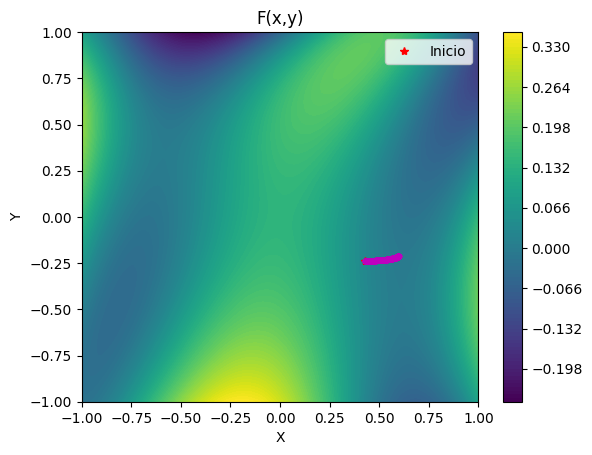

In [82]:
# Genera aleatoriamente un punto (x,y) para evaluar en la superficie
xys = np.random.rand(2) * 2 - 1
print(xys)
alpha = 0.001      # Taza de aprendizaje
e = 1E-4          # delta x

grad = np.zeros(2)

for k in range(1000):
  for i, _t in enumerate(xys):
    xys2 = np.copy(xys)           # par x, y, originales
    xys2[i] = xys2[i] + e
    grad[i] = (f(xys2[0], xys2[1]) - f(xys[0], xys[1]))/e  # Función para hallar el gradiente

  xys = xys - alpha*grad         # Actualización de x, y

  if k == 0:
    plt.plot(xys[0], xys[1], 'r*', label='Inicio')
  else:
    plt.plot(xys[0], xys[1], 'm.')

plt.contourf(X, Y, Z, 100, cmap='viridis')
plt.colorbar()
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("F(x,y)")

#### 8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores,
construya un algorítmo que permita determinar una regresión lineal.



Text(0.5, 0.92, 'F(x,y)')

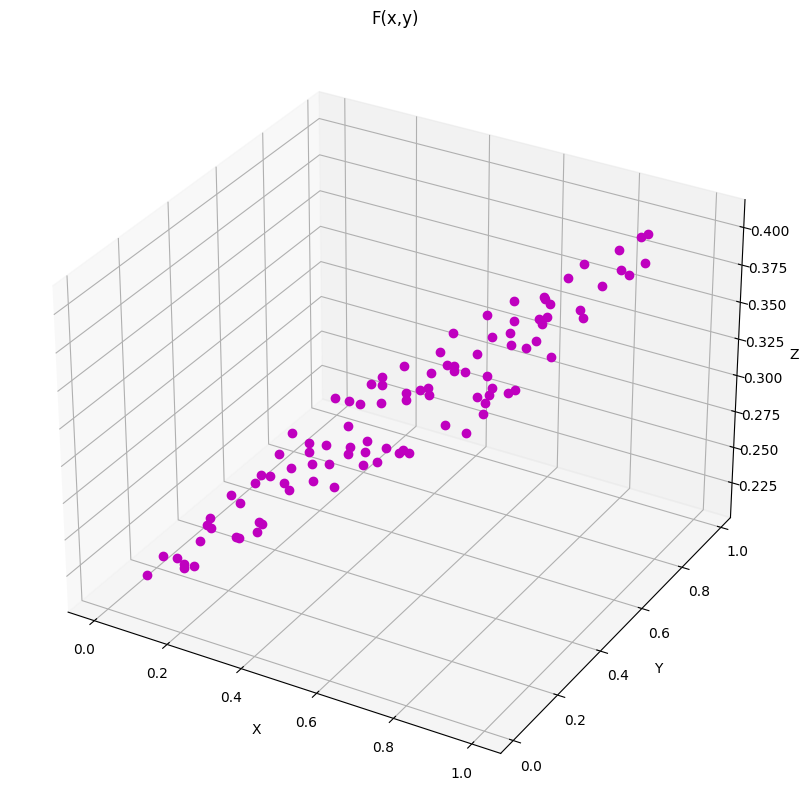

In [83]:
# Variables
x1 = np.linspace(0, 1, 100)
x2 = np.random.random(100)

# Resultado de la función
f2 = lambda x1, x2: 0.2 + 0.2*x1 + 0.02*x2
y = f2(x1, x2)

# Gráfica de los datos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, x2, y, 'mo')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("F(x,y)")

In [84]:
def H(theta, X):
  return theta.T@X

def costo(H, Y):
  return np.mean((H-Y)**2)

In [86]:
# Parámetros a probar
theta0 = np.linspace(0, 1, m)       # Lista de thetas 0
theta1 = np.linspace(0, 1, m)        # Lista de thetas1
theta2 = np.linspace(0, 1, m)        # Lista de thetas2

# MAtriz 3xm con los valores de las variables
matrix = np.array([np.ones(m), x1, x2])

In [87]:
alpha = 0.01      # Taza de aprendizaje
e = 1E-3          # delta x

grad = np.zeros(3)    # generar array con 3 valores para el gradiente
Thetas = np.array([0, 0, 0]) # Iniciando con valores 0 para los parámetros

for k in range(1000):
  for i, _t in enumerate(Thetas):    # Función para hallar el gradiente
    Th_new = np.copy(Thetas)           # par x, y, originales
    Th_new[i] = Th_new[i] + e
    H1 = H(Thetas, matrix)
    H2 = H(Th_new, matrix)
    J1 = costo(H1, y)
    J2 = costo(H2, y)
    grad[i] = (J2-J1)/e

  Thetas = Thetas - alpha*grad

Text(0.5, 0.92, 'F(x,y)')

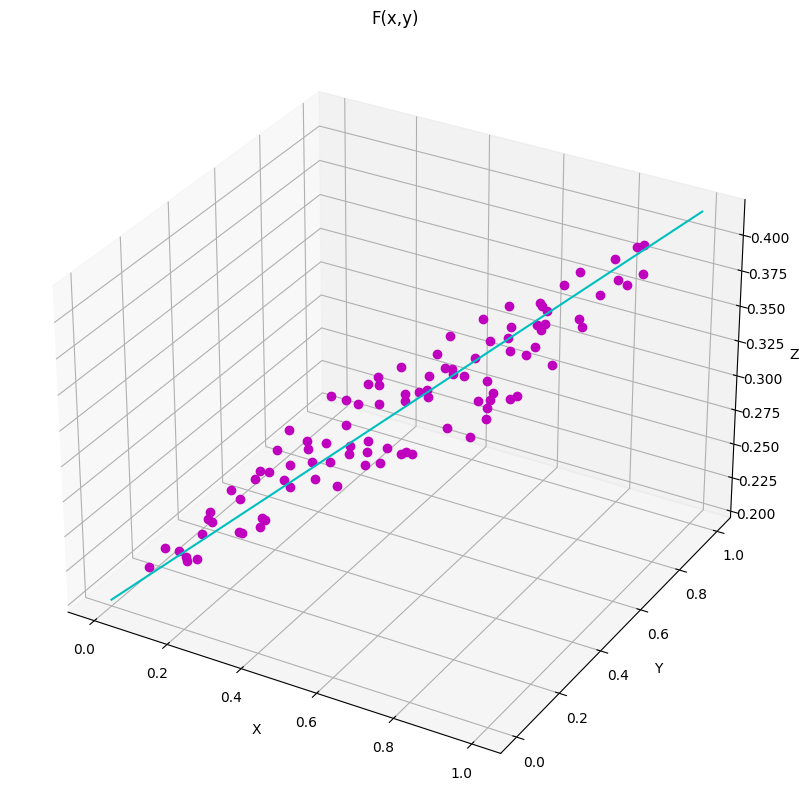

In [93]:
p1 = np.linspace(0,1,m)   # Nuevas variables
p2 = np.linspace(0,1,m)
matriz2 = np.array([np.ones(m), p1, p2])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, x2, y, 'mo')
ax.plot(p1, p2, H(Thetas, matriz2), 'c')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("F(x,y)")

#### 9. Compare su resultado empleando la libreria linearRegresion() de sklearn.

In [94]:
from sklearn.linear_model import LinearRegression

Text(0.5, 0.92, 'F(x,y)')

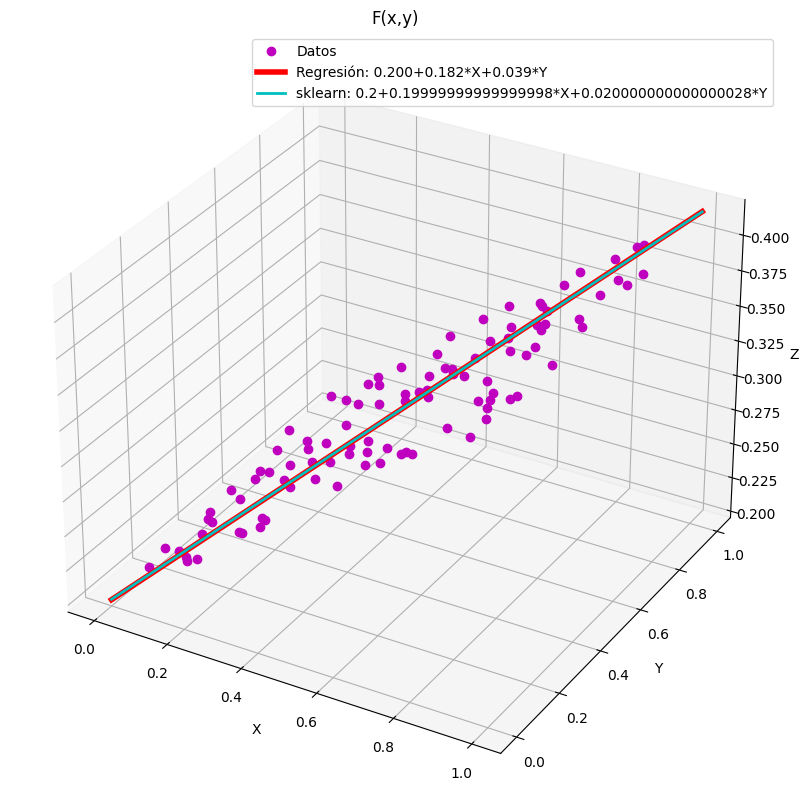

In [116]:
# Ajustar el modelo de regresión lineal
X = np.vstack((x1, x2)).T  # Crear matriz
reg = LinearRegression().fit(X, y)

# Predecir valores
y_pred = reg.predict(np.vstack((p1, p2)).T)

# Gráficos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, x2, y, 'mo', label='Datos')
ax.plot(p1, p2, H(Thetas, matriz2), 'r', linewidth = 4,
        label=f'Regresión: {Thetas[0]:.3f}+{Thetas[1]:.3f}*X+{Thetas[2]:.3f}*Y')
ax.plot(p1, p2, y_pred, 'c', linewidth = 2, label=
        f'sklearn: {reg.intercept_}+{reg.coef_[0]}*X+{reg.coef_[1]}*Y')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
ax.set_title("F(x,y)")